# Problem Statement

Principal Component Analysis

In [302]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Load the Data file into Python DataFrame and view top 10 rows

In [303]:
# Read the dataset
canc_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
canc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [304]:
#datatypes of each columns
canc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [305]:
#shape of the dataset
canc_df.shape

(699, 11)

In [306]:
canc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [307]:
canc_df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [308]:
canc_df=canc_df.rename(index=str, columns={"Cell Shape":"cell_shape","Bare Nuclei":"bare_nuclei","Cell Size": "cell_size", "Marginal Adhesion": "marginal_adhesion", "Single Epithelial Cell Size":"single_epithelial_cell_size", "Normal Nucleoli":"normal_nucleoli","Bland Chromatin":"bland_chromatin"})
canc_df.head()

,ID,ClumpThickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,normal_nucleoli,bland_chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [309]:
canc_df.columns

Index(['ID', 'ClumpThickness', 'cell_size', 'cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'normal_nucleoli',
       'bland_chromatin', 'Mitoses', 'Class'],
      dtype='object')

## Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [310]:
#missing value check
canc_df.isnull().sum()

ID                             0
ClumpThickness                 0
cell_size                      0
cell_shape                     0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
normal_nucleoli                0
bland_chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [311]:
#There are no missing values

In [312]:
#Looking at the data there is incorrect value '?' in the column 'bare_nuclei'
#replacing the same with 1 as it has the highest frequency as seen in descriptive statistics 
canc_df.bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [313]:
#Looking at the data there is incorrect value '?' in the column 'bare_nuclei'
#replacing the same with 1 as it has the highest frequency as seen in descriptive statistics 
canc_df = canc_df.replace('?', np.nan)
canc_df = canc_df.apply(lambda x: x.fillna(1),axis=0)

In [315]:
# converting the bare_nuclei column from object / string type to int
canc_df['bare_nuclei'] = canc_df['bare_nuclei'].astype('int64')  

In [316]:
canc_df.bare_nuclei.value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [317]:
#checking for duplicate records
temp_dupli = canc_df.duplicated()
temp_dupli.shape

(699,)

In [318]:
canc_df.drop_duplicates(inplace = True)
canc_df.shape

(690, 11)

## Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


   Class  count      prop
0      2    452  0.655072
1      4    238  0.344928


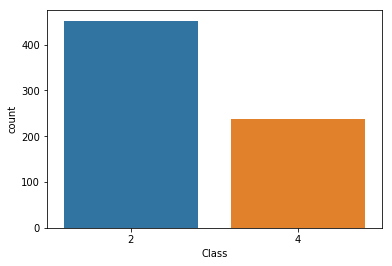

In [125]:
## Target Variable Frequency Distribution
freq = canc_df['Class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(canc_df['Class'])

In [126]:
canc_df.corr()

,ID,ClumpThickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,normal_nucleoli,bland_chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
cell_size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
cell_shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
marginal_adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
single_epithelial_cell_size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
bare_nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
normal_nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
bland_chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


#Insights:

As per above table, the Class variable is highly correlated with cell_size, cell_shape,bare_nuclei as compared to other columns.
Also, cell_size and cell_shape have high correlation.
There is very low correlation between Mitosis and Class

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


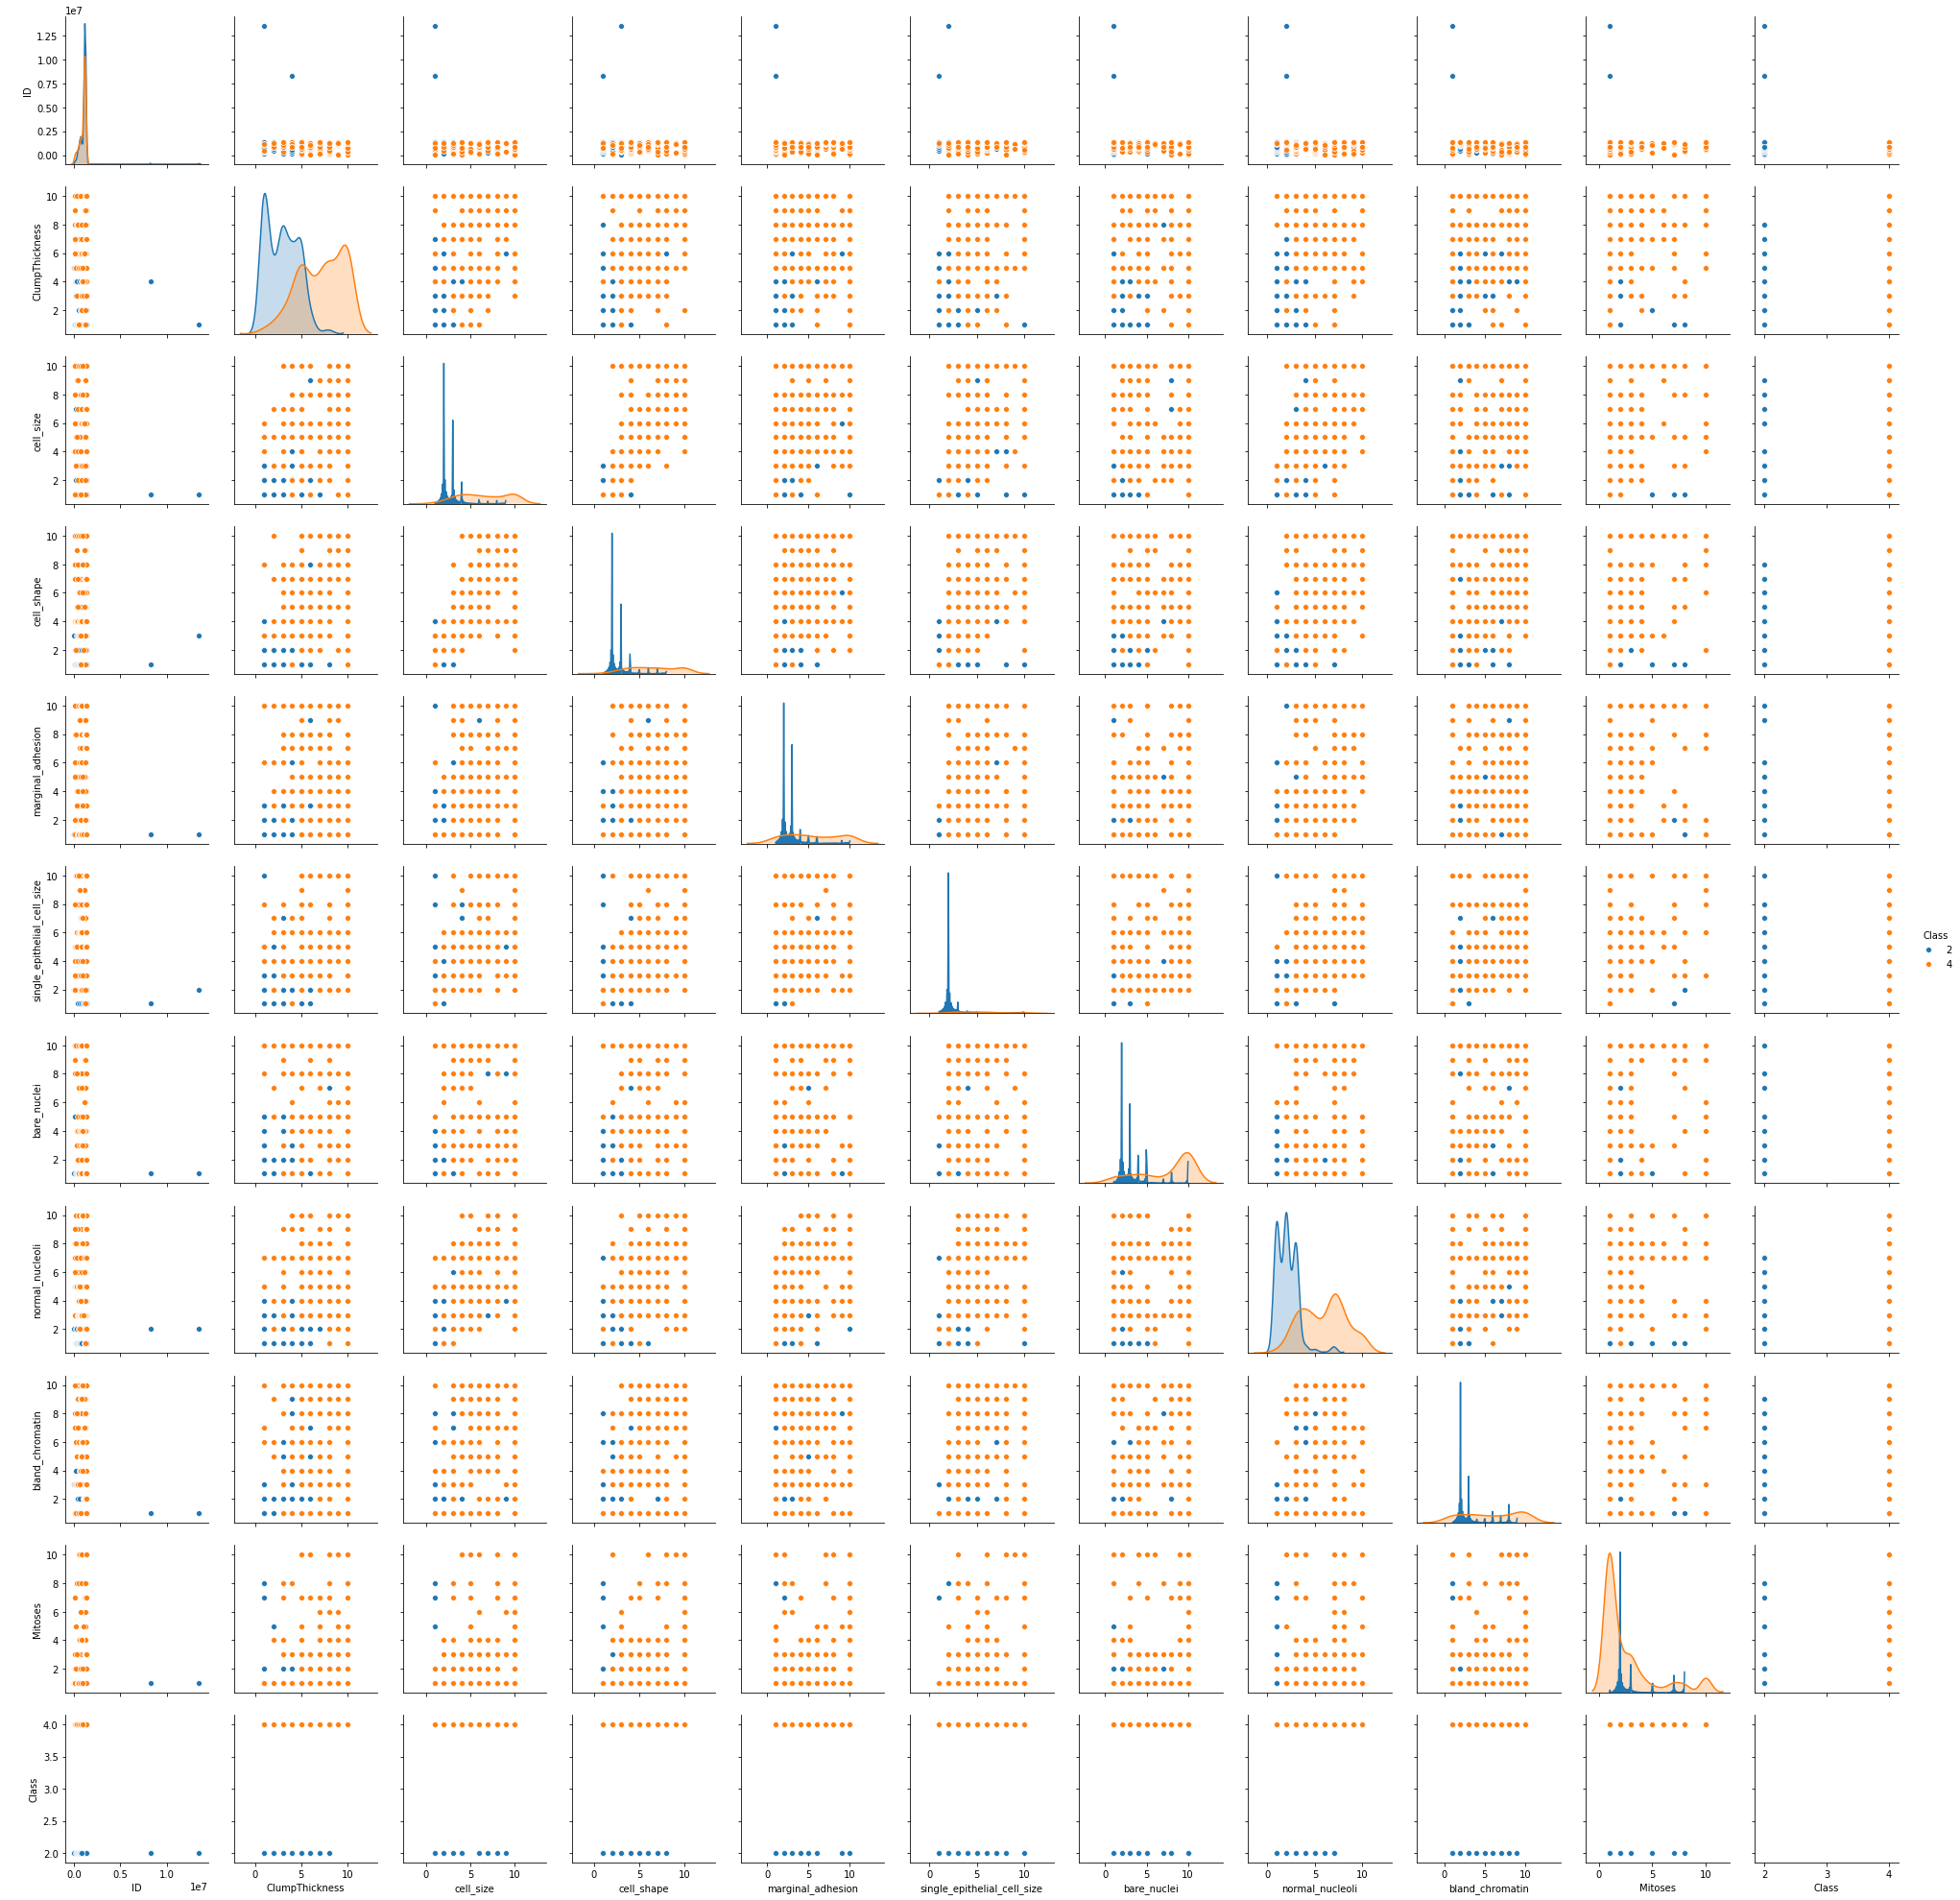

In [127]:
#Visually inspect the covariance between independent dimensions and between class and independent dimensions

sns.pairplot(canc_df, diag_kind='kde', hue='Class') 

In [319]:
#Insights

#cell_size, cell_shape, marginal_adhesion, single_epithilial_cell_size,bare_nuclei have sharp peaks for class 2 as compared to class 4. 
#Also the data for Mitosis for class 2 is almost normally distributed.
#For ClumThickness attribute it looks there are 3-4 gaussian curves overlapping, hence the data must be coming in from different processes.

## Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [320]:
canc_df.drop("ID",axis=1,inplace=True)
canc_df.columns

Index(['ClumpThickness', 'cell_size', 'cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'normal_nucleoli',
       'bland_chromatin', 'Mitoses', 'Class'],
      dtype='object')

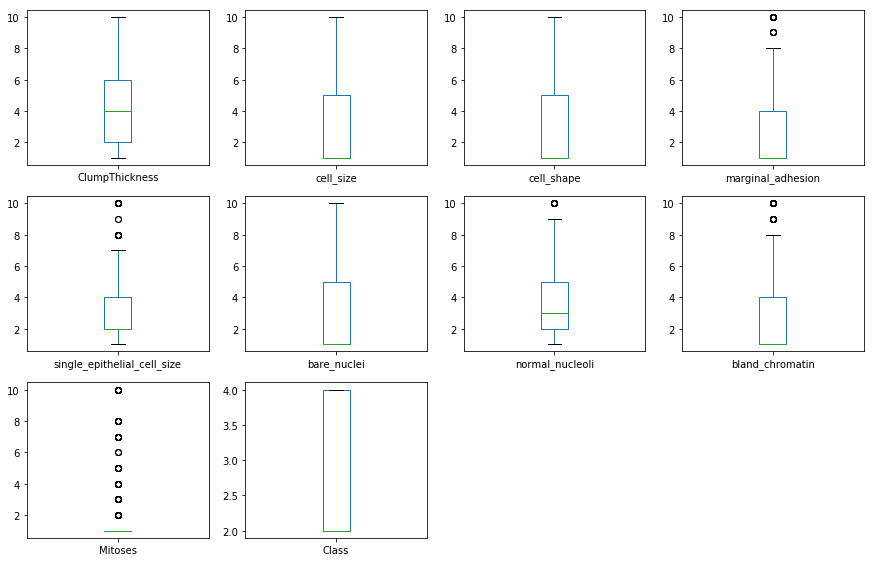

In [321]:
# box and whisker plots
canc_df.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [323]:
canc_df.Mitoses.value_counts()

1     571
2      35
3      32
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [324]:
#replacing the Mitoses outliers with 3 as the values upto 3 covers 90% of the data
canc_df["Mitoses"]=canc_df["Mitoses"].map(lambda x:3 if  x>3 else x)

In [325]:
# Split the cancer data into separate training (80%) and test (20%) sets and then standardize it to unit variance:
X = canc_df.drop("Class",axis = 1)
y = canc_df.pop("Class")

In [326]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [327]:
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

## Q6 Create a covariance matrix for identifying Principal components

In [328]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00181488 0.65328236 0.67206677 0.51603161 0.53420265 0.60658653
  0.56789248 0.57011234 0.43086561]
 [0.65328236 1.00181488 0.90358846 0.72292454 0.7344319  0.67067262
  0.75838027 0.73089188 0.51481853]
 [0.67206677 0.90358846 1.00181488 0.69817088 0.71081433 0.68973454
  0.724745   0.72553538 0.47553934]
 [0.51603161 0.72292454 0.69817088 1.00181488 0.59793016 0.65907481
  0.6702636  0.60506442 0.515794  ]
 [0.53420265 0.7344319  0.71081433 0.59793016 1.00181488 0.57208172
  0.60974777 0.63529603 0.51162266]
 [0.60658653 0.67067262 0.68973454 0.65907481 0.57208172 1.00181488
  0.6589534  0.57032605 0.46076273]
 [0.56789248 0.75838027 0.724745   0.6702636  0.60974777 0.6589534
  1.00181488 0.65875357 0.38483732]
 [0.57011234 0.73089188 0.72553538 0.60506442 0.63529603 0.57032605
  0.65875357 1.00181488 0.49827382]
 [0.43086561 0.51481853 0.47553934 0.515794   0.51162266 0.46076273
  0.38483732 0.49827382 1.00181488]]


## Q7 Identify eigen values and eigen vector

In [329]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30878523 -0.11761077  0.02400173  0.80792892  0.28286908 -0.29816138
  -0.09372958 -0.24420668  0.012526  ]
 [-0.37665858 -0.11591126  0.73291023 -0.1377672   0.13594966  0.45062219
   0.01950316 -0.2541718  -0.04504819]
 [-0.3720045  -0.1710209  -0.66397446 -0.04897559  0.15380431  0.52683683
   0.19257641 -0.21671815 -0.06195623]
 [-0.33471876  0.0433813  -0.03074277 -0.2236519  -0.54068165 -0.43126293
   0.25694448 -0.53588483  0.05998954]
 [-0.33016477  0.11228825 -0.03423399 -0.31150413  0.35858044 -0.36388608
  -0.05440979  0.17421948 -0.6970437 ]
 [-0.32884618 -0.10735348  0.07512446  0.30798186 -0.53334081  0.13423165
   0.26811594  0.59802005 -0.21875607]
 [-0.33951514 -0.32247899 -0.10228074 -0.18120402 -0.18496871 -0.0591846
  -0.79064077  0.14829165  0.22939279]
 [-0.33553702  0.00813609  0.02474784 -0.20200961  0.36556294 -0.23968945
   0.36543411  0.36231572  0.62452087]
 [-0.25952225  0.90189239 -0.05069367  0.10159647 -0.0680318   0.18196047
  -0.2328

##  Q8 Find variance and cumulative variance by each eigen vector

In [330]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
print("Variance Explained", var_exp)

Variance Explained [66.44552538100595, 7.651070892034388, 5.726926071188596, 5.436242618438831, 4.15041318259969, 3.538794871590008, 3.14376358862649, 2.8873193182053325, 1.0199440763107102]


In [331]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.44552538  74.09659627  79.82352234  85.25976496  89.41017815
  92.94897302  96.09273661  98.98005592 100.        ]


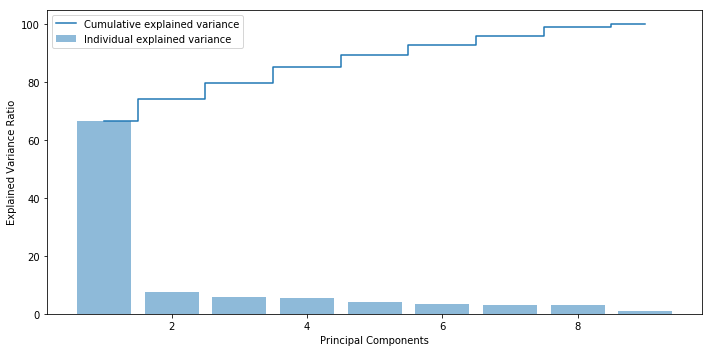

In [332]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [333]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [334]:
pca.explained_variance_ratio_

array([0.70551423, 0.07883358, 0.05858219, 0.04603571, 0.03764941,
       0.03054211])

## Q10 Find correlation between components and features

In [335]:
pca.get_covariance()

array([[ 7.91122716,  5.64790487,  5.55917258,  4.10316196,  3.25310285,
         6.23307218,  3.88416148,  4.95861623,  0.7800507 ],
       [ 5.64790487,  9.40704871,  7.93108901,  6.24028943,  5.11420916,
         7.489481  ,  5.78007091,  6.88996448,  1.01708057],
       [ 5.55917258,  7.93108901,  8.47800115,  5.75341036,  4.85857835,
         7.3359396 ,  5.37291266,  6.51033814,  0.96914536],
       [ 4.10316196,  6.24028943,  5.75341036,  7.99538417,  3.75934711,
         6.79601676,  4.66474331,  5.27518796,  0.92105487],
       [ 3.25310285,  5.11420916,  4.85857835,  3.75934711,  4.4296855 ,
         4.65089795,  3.04047146,  4.39576311,  0.67718478],
       [ 6.23307218,  7.489481  ,  7.3359396 ,  6.79601676,  4.65089795,
        13.3529724 ,  5.93158237,  6.42469232,  1.09992731],
       [ 3.88416148,  5.78007091,  5.37291266,  4.66474331,  3.04047146,
         5.93158237,  5.89952794,  5.03083528,  0.66003633],
       [ 4.95861623,  6.88996448,  6.51033814,  5.27518796,  4

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


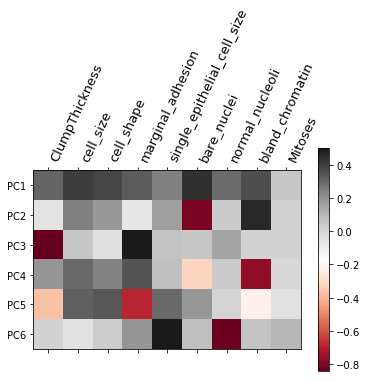

In [345]:
plt.matshow(pca.components_,cmap='RdGy')
plt.yticks([0,1,2,3,4,5],['PC1','PC2','PC3','PC4','PC5','PC6'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(canc_df.columns)),canc_df.columns,rotation=65,ha='left',fontsize=13)
plt.tight_layout()
plt.show()#

## SVM

## Q1 Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [371]:
# Read the dataset
pima_df = pd.read_csv("pima-indians-diabetes.csv")
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [372]:
# Eye ball the imported dataset
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [373]:
#Datatypes of each column
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [374]:
# replace the 0s in pima_df with median value
pima_df.Glucose = pima_df.Glucose.replace(0, pima_df.Glucose.median())
pima_df.SkinThickness = pima_df.SkinThickness.replace(0, pima_df.SkinThickness.median())
pima_df.Insulin = pima_df.Insulin.replace(0, pima_df.Insulin.median())
pima_df.BMI = pima_df.BMI.replace(0, pima_df.BMI.median())
pima_df.BloodPressure = pima_df.BloodPressure.replace(0, pima_df.BloodPressure.median())
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [375]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Check dimension of dataset

In [376]:
#shape of dataset
pima_df.shape

(768, 9)

## Q2 Check distribution of dependent variable, Outcome and plot it (1 Marks)

   Class  count      prop
0      0    500  0.651042
1      1    268  0.348958


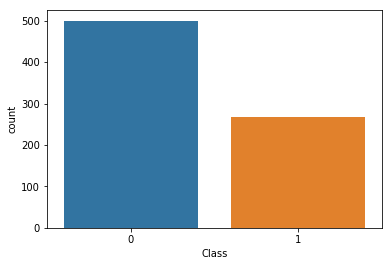

In [377]:
## Target Variable Frequency Distribution
freq = pima_df['Class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
sns.countplot(pima_df['Class'])

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [378]:
# Check data types and info of dataset

In [379]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [380]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


## Q3 Check data distribution using summary statistics and provide your findings

In [381]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Q4 Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [382]:
pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


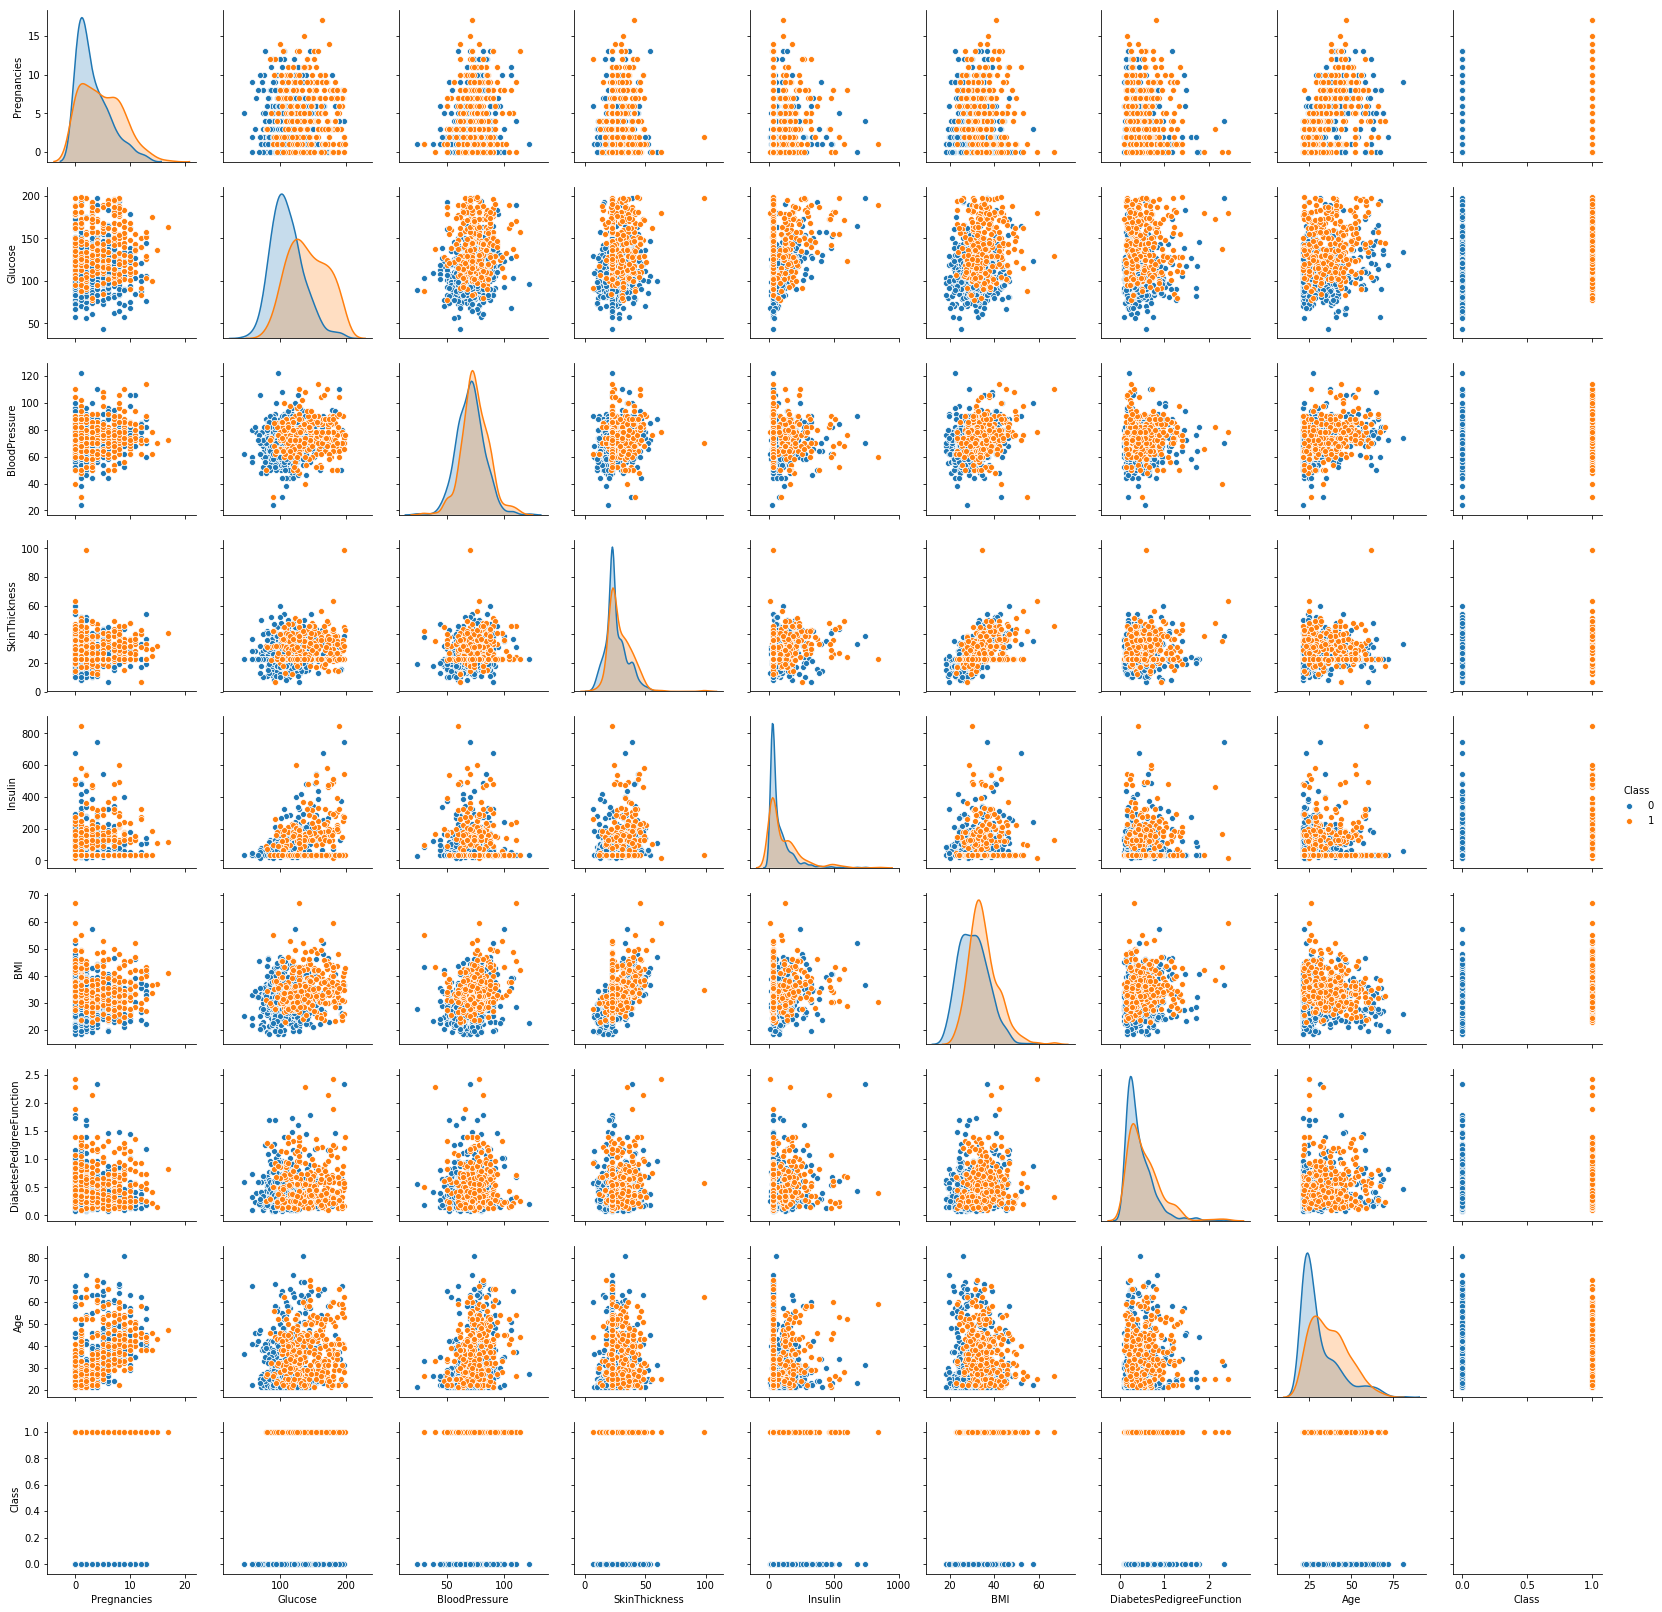

In [383]:
#Visually inspect the covariance between independent dimensions and between class and independent dimensions
sns.pairplot(pima_df, diag_kind='kde', hue='Class') 

In [384]:
#Looking at the pairplot for Insulin, SkinThickness has more outliers compared to other attributes.
#Age and Pregnancy attributes have high correlation
#Some of the attributes like Age, Pregnancy, etc have normal distribution
#Also, SkinThickness and BMI are highly correlated.
#There is no correlation between below atrributes:
# 1. Insulin and BloodPressure
# 2. Insulin and Age
# 3. Pregnancies and Insulin

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [385]:
# Split the cancer data into separate training (80%) and test (20%) sets and then standardize it to unit variance:
X = pima_df.drop("Class",axis = 1)
y = pima_df.pop("Class")

In [386]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y, random_state=1)

## Q5 Train Support Vector Machine Model(1 Marks)

In [387]:
# use from sklearn.svm import SVC
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [388]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.6493506493506493


In [389]:
# your insights
#The model is in overfit zone as the training accuracy is 100% and the test accuracy is very low

## Q6 Scale the data points using MinMaxScaler ( 1 Marks)

In [390]:
from sklearn.preprocessing import MinMaxScaler
X_train_sd = MinMaxScaler().fit_transform(X_train)
X_test_sd = MinMaxScaler().fit_transform(X_test)

## Q7 Fit SVM Model on Scale data and give your observation( 1 Marks)

In [391]:
clf_scale = SVC()
clf_scale.fit(X_train_sd , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [392]:
print(clf_scale.score(X_train_sd, y_train))
print(clf_scale.score(X_test_sd, y_test))

0.7839851024208566
0.7575757575757576


In [393]:
#the accuracy improves after scaling the data using MinMaxScalar and its no longer in overfit zone

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [394]:
clf_scale = SVC(C=1000)
clf_scale.fit(X_train_sd , y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [395]:
print(clf_scale.score(X_train_sd, y_train))
print(clf_scale.score(X_test_sd, y_test))

0.8230912476722533
0.7445887445887446


In [ ]:
#In this case, training accuracy increases when we increase C while the testing accuracy slightly reduced. 

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779